In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def f(x, y):
    """
    Функция f(x, y) = sin(2x) + cos(2y).

    :param x: Значение x (float).
    :param y: Значение y (float).
    :return: Результат функции (float).
    """
    return np.sin(2*x) * np.cos(2*y)

In [15]:
def grad_f(x, y):
    """
    Градиент функции f(x, y) определенной к x и y.

    :param x: Значение x (float).
    :param y: Значение y (float).
    :return: Градиент функции (np.array[2], где первый элемент - градиент по x, второй - градиент по y).
    """
    grad_x = 2 * np.cos(2*x)
    grad_y = -2 * np.sin(2*y)
    return np.array([grad_x, grad_y])

In [4]:
def grad_descent_2d(f, grad_f, lr, num_iter=100, x0=None, y0=None):
    """
    Функция, которая реализует градиентный спуск в минимум для функции f от двух переменных.

    :param f: Функция двух переменных f(x, y).
    :param grad_f: Градиент функции f(x, y) (np.array[2]).
    :param lr: Learning rate алгоритма.
    :param num_iter: Количество итераций градиентного спуска.
    :param x0: Начальное значение x (float).
    :param y0: Начальное значение y (float).
    :return: Матрица размерности (num_iter, 3), где каждая строка содержит (x, y, f(x, y)).
    """
    if x0 is None:
        x0 = np.random.random()
    if y0 is None:
        y0 = np.random.random()

    history = []

    curr_x, curr_y = x0, y0
    for iter_num in range(num_iter):
        entry = np.array([curr_x, curr_y, f(curr_x, curr_y)])
        history.append(entry)

        gradient = grad_f(curr_x, curr_y)
        curr_x -= lr * gradient[0]
        curr_y -= lr * gradient[1]

    return np.vstack(history)

In [16]:
steps = grad_descent_2d(f, grad_f, lr=0.1, num_iter=20)

In [17]:
steps

array([[ 0.81876091,  0.27122325,  0.85454241],
       [ 0.83209611,  0.37446982,  0.72921922],
       [ 0.85074815,  0.51064233,  0.51781636],
       [ 0.87681378,  0.68119826,  0.20344626],
       [ 0.91317665,  0.87687091, -0.1760182 ],
       [ 0.96373351,  1.07353333, -0.5106068 ],
       [ 1.0335648 ,  1.24123348, -0.6951386 ],
       [ 1.12880569,  1.36371867, -0.70789458],
       [ 1.2556212 ,  1.44420203, -0.57063597],
       [ 1.41718543,  1.49430046, -0.29887939],
       [ 1.60782091,  1.52477958,  0.07366841],
       [ 1.80727283,  1.54316031,  0.45482149],
       [ 1.98531823,  1.55420909,  0.73688006],
       [ 2.12043444,  1.56084277,  0.89070231],
       [ 2.21128265,  1.56482393,  0.95822592],
       [ 2.2684393 ,  1.56721283,  0.98461226],
       [ 2.30336144,  1.56864622,  0.99441334],
       [ 2.32445536,  1.56950626,  0.99798261],
       [ 2.33714249,  1.57002228,  0.99927293],
       [ 2.34476144,  1.5703319 ,  0.99973815]])

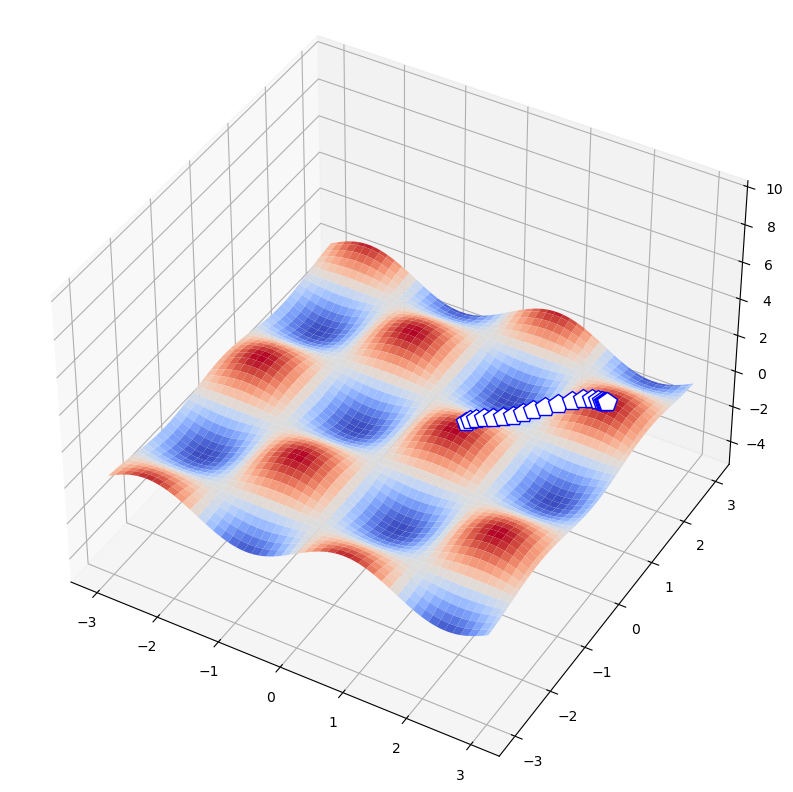

In [18]:
from matplotlib import cm

path = []

X, Y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
Z = f(X, Y)

fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=plt.cm.coolwarm, zorder=2)
ax.plot(xs=steps[:, 0], ys=steps[:, 1], zs=steps[:, 2],
        marker='p', markersize=15, zorder=3,
        markerfacecolor='w', lw=3, c='blue')

ax.set_zlim(-5, 10)
ax.view_init(elev=40)
plt.show()

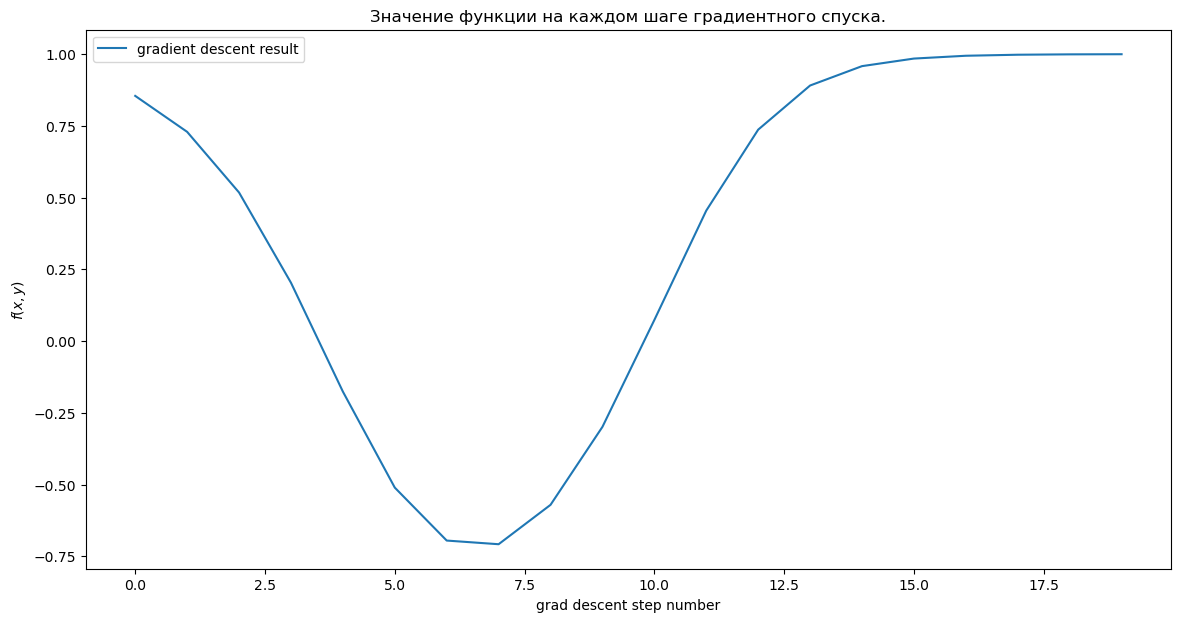

In [19]:
plt.figure(figsize=(14, 7))
plt.xlabel('grad descent step number')
plt.ylabel('$f(x, y)$')
plt.title('Значение функции на каждом шаге градиентного спуска.')

f_values = steps[:, 2]
plt.plot(f_values, label='gradient descent result')
plt.legend()